In [1]:
# Adding src/ folder to import path
import sys
sys.path.append("./src")

In [2]:
import os.path
import pandas as pd
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

DATA_PATH = "/media/ketan/Data/birdclef-2021"
SAMPLE_RATE = 32000
NORM_ENERGY = 100
N_MEL = 200

In [3]:
%%sh 
ls /media/ketan/Data/birdclef-2021

README.md
sample_submission.csv
test.csv
test_soundscapes
train_metadata.csv
train_short_audio
train_soundscape_labels.csv
train_soundscapes


In [34]:
metadata_df = pd.read_csv(DATA_PATH + "/train_metadata.csv")
metadata_df = metadata_df[["primary_label", "latitude", "longitude", "date", "time", "rating", "filename", "common_name", "scientific_name"]]
labels_df = pd.read_csv(DATA_PATH + "/train_soundscape_labels.csv")

In [35]:
metadata_df

,primary_label,latitude,longitude,date,time,rating,filename,common_name,scientific_name
0,acafly,35.3860,-84.1250,2012-08-12,09:30,2.5,XC109605.ogg,Acadian Flycatcher,Empidonax virescens
1,acafly,9.1334,-79.6501,2000-12-26,?,3.0,XC11209.ogg,Acadian Flycatcher,Empidonax virescens
2,acafly,5.7813,-75.7452,2012-01-10,15:20,3.0,XC127032.ogg,Acadian Flycatcher,Empidonax virescens
3,acafly,4.6717,-75.6283,2009-06-19,07:50,3.5,XC129974.ogg,Acadian Flycatcher,Empidonax virescens
4,acafly,4.6717,-75.6283,2009-06-19,07:50,3.5,XC129981.ogg,Acadian Flycatcher,Empidonax virescens
...,...,...,...,...,...,...,...,...,...
62869,yetvir,30.2150,-97.6505,2020-07-10,08:30,1.0,XC591680.ogg,Yellow-throated Vireo,Vireo flavifrons
62870,yetvir,42.3005,-72.5877,2019-05-31,09:30,5.0,XC600085.ogg,Yellow-throated Vireo,Vireo flavifrons
62871,yetvir,42.3005,-72.5877,2020-06-02,08:30,4.5,XC602701.ogg,Yellow-throated Vireo,Vireo flavifrons
62872,yetvir,32.2357,-99.8811,2019-04-27,17:30,4.0,XC614733.ogg,Yellow-throated Vireo,Vireo flavifrons


In [6]:
labels_df

,row_id,site,audio_id,seconds,birds
0,7019_COR_5,COR,7019,5,nocall
1,7019_COR_10,COR,7019,10,nocall
2,7019_COR_15,COR,7019,15,nocall
3,7019_COR_20,COR,7019,20,nocall
4,7019_COR_25,COR,7019,25,nocall
...,...,...,...,...,...
2395,54955_SSW_580,SSW,54955,580,nocall
2396,54955_SSW_585,SSW,54955,585,grycat
2397,54955_SSW_590,SSW,54955,590,grycat
2398,54955_SSW_595,SSW,54955,595,nocall


In [7]:
from birdclef.load_data import load_short_audio, load_soundscape_audio

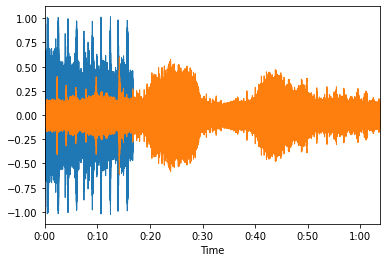

In [8]:
signal_1 = load_short_audio('acafly', 'XC109605.ogg', DATA_PATH + '/train_short_audio', SAMPLE_RATE)
signal_2 = load_short_audio('acafly', 'XC11209.ogg', DATA_PATH + '/train_short_audio', SAMPLE_RATE)

librosa.display.waveplot(signal_2, sr=SAMPLE_RATE)
librosa.display.waveplot(signal_1, sr=SAMPLE_RATE)

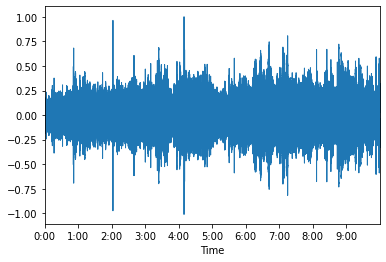

In [9]:
for x in load_soundscape_audio('7019_COR', DATA_PATH + '/train_soundscapes', SAMPLE_RATE):
    librosa.display.waveplot(x[1], sr=SAMPLE_RATE)

(128, 3980)


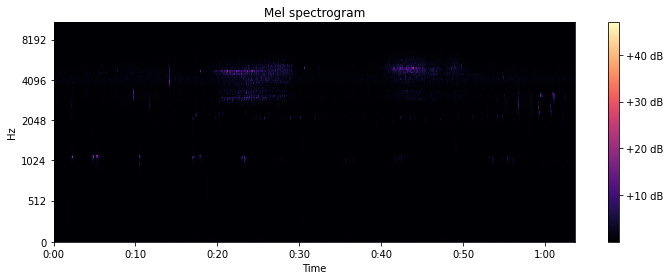

In [24]:
from birdclef.postprocessing import get_mel_spec

plt.figure(figsize=(10, 4))
mel_spec = get_mel_spec(signal_1)
print(mel_spec.shape)
librosa.display.specshow(mel_spec, sr=SAMPLE_RATE, y_axis='mel', fmax=None, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

(128, 1041)


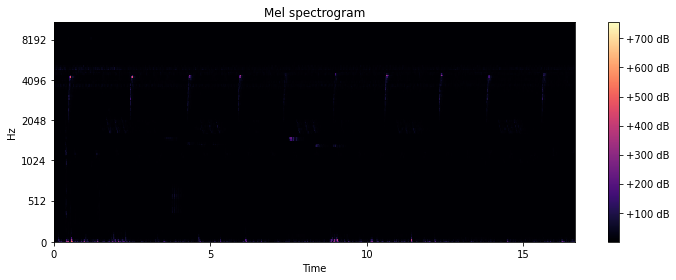

In [25]:
plt.figure(figsize=(10, 4))
mel_spec = get_mel_spec(signal_2)
print(mel_spec.shape)
librosa.display.specshow(mel_spec, sr=SAMPLE_RATE, y_axis='mel', fmax=None, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [31]:
metadata_df[["primary_label", "latitude", "longitude", "date", "rating", "filename", "common_name", "scientific_name"]]

,primary_label,latitude,longitude,date,rating,filename,common_name,scientific_name
0,acafly,35.3860,-84.1250,2012-08-12,2.5,XC109605.ogg,Acadian Flycatcher,Empidonax virescens
1,acafly,9.1334,-79.6501,2000-12-26,3.0,XC11209.ogg,Acadian Flycatcher,Empidonax virescens
2,acafly,5.7813,-75.7452,2012-01-10,3.0,XC127032.ogg,Acadian Flycatcher,Empidonax virescens
3,acafly,4.6717,-75.6283,2009-06-19,3.5,XC129974.ogg,Acadian Flycatcher,Empidonax virescens
4,acafly,4.6717,-75.6283,2009-06-19,3.5,XC129981.ogg,Acadian Flycatcher,Empidonax virescens
...,...,...,...,...,...,...,...,...
62869,yetvir,30.2150,-97.6505,2020-07-10,1.0,XC591680.ogg,Yellow-throated Vireo,Vireo flavifrons
62870,yetvir,42.3005,-72.5877,2019-05-31,5.0,XC600085.ogg,Yellow-throated Vireo,Vireo flavifrons
62871,yetvir,42.3005,-72.5877,2020-06-02,4.5,XC602701.ogg,Yellow-throated Vireo,Vireo flavifrons
62872,yetvir,32.2357,-99.8811,2019-04-27,4.0,XC614733.ogg,Yellow-throated Vireo,Vireo flavifrons
